# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1, 1, 1],
       [1, 1, 1]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
#A + B

In [15]:
#A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [24]:
#A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

/home/ukwattat/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


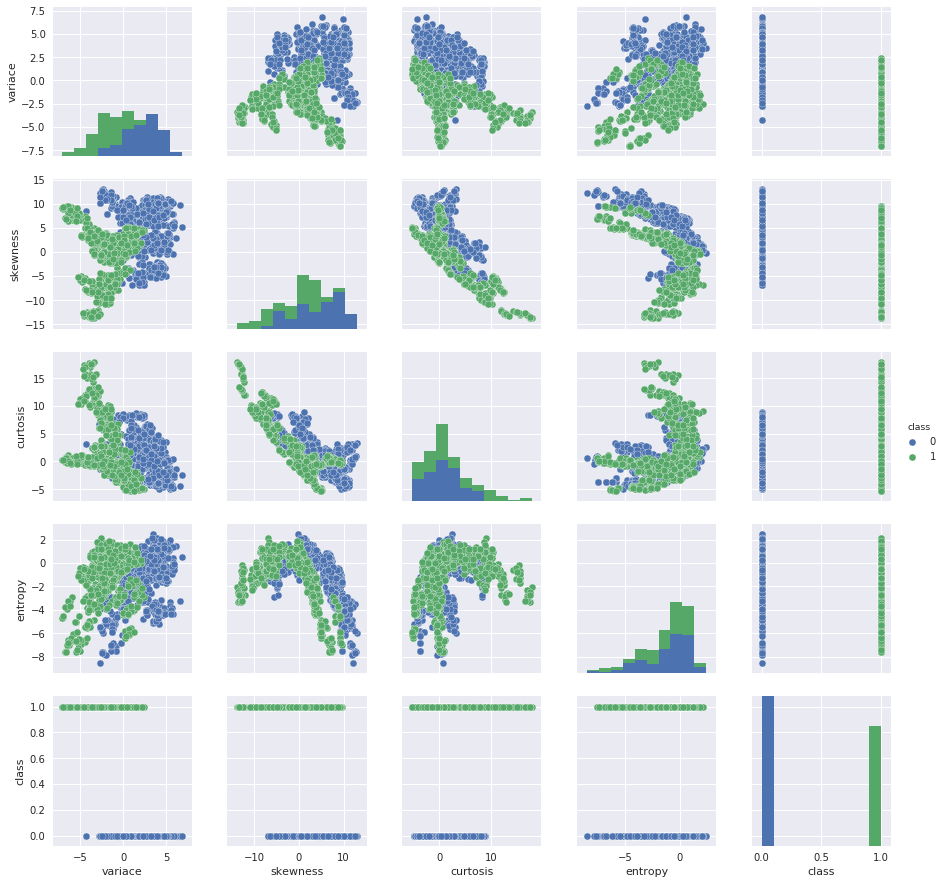

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99344978,  0.99343545,  0.99124726])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.6015 - acc: 0.6094     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.5793 - acc: 0.6333     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.5592 - acc: 0.6635     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.5407 - acc: 0.6948     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.5238 - acc: 0.7208     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.5082 - acc: 0.7417     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.4937 - acc: 0.7531     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4802 - acc: 0.7688     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.4676 - acc: 0.7823     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [36]:
history.history

{'acc': [0.609375,
  0.6333333333333333,
  0.6635416666666667,
  0.6947916666666667,
  0.72083333333333333,
  0.7416666666666667,
  0.75312500000000004,
  0.76875000000000004,
  0.78229166666666672,
  0.79479166666666667],
 'loss': [0.60146648486455279,
  0.57928016583124797,
  0.55918557643890376,
  0.5407203882932663,
  0.52380091647307081,
  0.50819579164187112,
  0.49369354645411173,
  0.48017483552296958,
  0.46756134629249574,
  0.45575222671031951]}

In [37]:
historydf = pd.DataFrame(history.history, index=history.epoch)

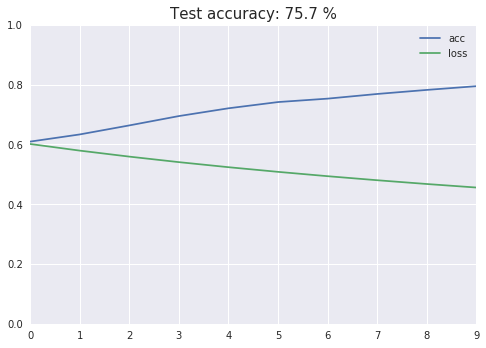

In [38]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [39]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [40]:
historydf = pd.concat(dflist, axis=1)

In [41]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.894792,0.500069,0.617708,0.699538,0.810417,0.453748,0.934375,0.241292
1,0.959375,0.435483,0.915625,0.367892,0.894792,0.307845,0.967708,0.121643
2,0.951042,0.391840,0.948958,0.275779,0.923958,0.243767,0.972917,0.093026
3,0.951042,0.360588,0.956250,0.235368,0.938542,0.203116,0.975000,0.079210
4,0.948958,0.337037,0.959375,0.210262,0.952083,0.175440,0.979167,0.070780
5,0.940625,0.318504,0.961458,0.192050,0.959375,0.155466,0.980208,0.064695
6,0.939583,0.303410,0.963542,0.177758,0.964583,0.140692,0.980208,0.060684
7,0.940625,0.290750,0.964583,0.166145,0.968750,0.129133,0.980208,0.057138
8,0.939583,0.279906,0.965625,0.156412,0.968750,0.119902,0.981250,0.054663
9,0.942708,0.270398,0.967708,0.148102,0.969792,0.112407,0.981250,0.052323


In [42]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [43]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.894792  0.500069  0.617708  0.699538  0.810417  0.453748   
1              0.959375  0.435483  0.915625  0.367892  0.894792  0.307845   
2              0.951042  0.391840  0.948958  0.275779  0.923958  0.243767   
3              0.951042  0.360588  0.956250  0.235368  0.938542  0.203116   
4              0.948958  0.337037  0.959375  0.210262  0.952083  0.175440   
5              0.940625  0.318504  0.961458  0.192050  0.959375  0.155466   
6              0.939583  0.303410  0.963542  0.177758  0.964583  0.140692   
7              0.940625  0.290750  0.964583  0.166145  0.968750  0.129133   
8              0.939583  0.279906  0.965625  0.156412  0.968750  0.119902   
9              0.942708  0.270398  0.967708  0.148102  0.969792  0.112407   

learning_rate      0.50            
metric              acc      loss  
0              0.934375  0.241292  
1              0.967708  0.121643  
2              0.972917  0.093026  
3              0.975000  0.079210  
4              0.979167  0.070780  
5              0.980208  0.064695  
6              0.980208  0.060684  
7              0.980208  0.057138  
8              0.981250  0.054663  
9              0.981250  0.052323

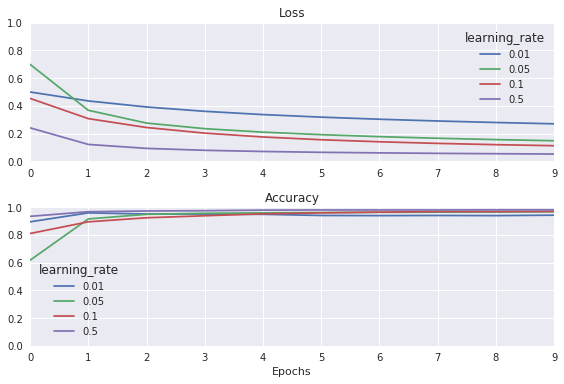

In [44]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [45]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [46]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [47]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.644792  0.605125  0.318750  1.058071  0.848958  0.458106   
1           0.683333  0.523084  0.363542  0.938992  0.853125  0.450740   
2           0.743750  0.460154  0.444792  0.838474  0.858333  0.443712   
3           0.802083  0.412664  0.540625  0.754417  0.866667  0.437027   
4           0.866667  0.376867  0.618750  0.684632  0.868750  0.430614   
5           0.898958  0.349661  0.693750  0.626675  0.869792  0.424478   
6           0.910417  0.328463  0.752083  0.578565  0.870833  0.418592   
7           0.915625  0.311511  0.810417  0.538195  0.873958  0.412926   
8           0.918750  0.297586  0.843750  0.504129  0.876042  0.407501   
9           0.921875  0.285867  0.863542  0.475226  0.878125  0.402297   

batch_size       128            
metric           acc      loss  
0           0.078125  1.308888  
1           0.077083  1.273393  
2           0.075000  1.238705  
3           0.078125  1.205485  
4           0.082292  1.174338  
5           0.086458  1.144442  
6           0.100000  1.115887  
7           0.107292  1.088304  
8           0.120833  1.062075  
9           0.138542  1.037187

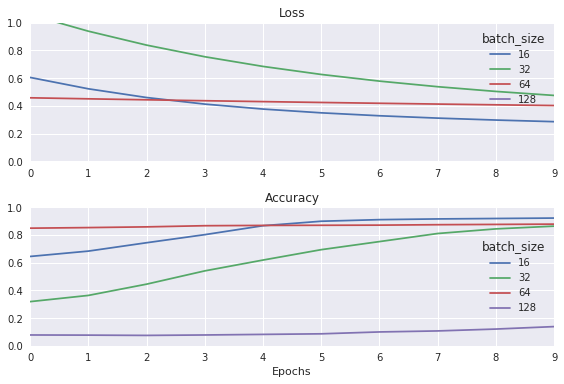

In [48]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [49]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [50]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [51]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

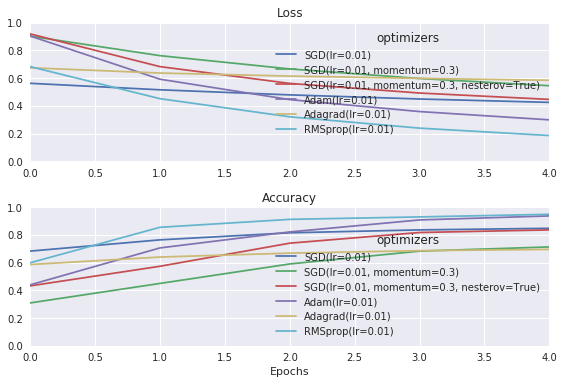

In [52]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [53]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    # if you increase the number of epochs, all should converge
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0) 
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [54]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

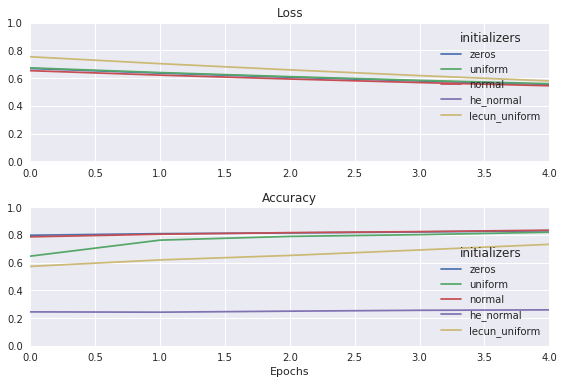

In [55]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [56]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.7207 - acc: 0.5670 - val_loss: 0.6462 - val_acc: 0.6458
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.6038 - acc: 0.7202 - val_loss: 0.5744 - val_acc: 0.7222
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.5233 - acc: 0.7723 - val_loss: 0.4875 - val_acc: 0.7812
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.4320 - acc: 0.8333 - val_loss: 0.3833 - val_acc: 0.8507
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.3362 - acc: 0.8899 - val_loss: 0.2841 - val_acc: 0.9167
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.2512 - acc: 0.9375 - val_loss: 0.1988 - val_acc: 0.9479
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.1814 - acc: 0.9583 - val_loss: 0.1403 - val_acc: 0.9653
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.1368 - acc: 0.9717 - val_l

In [57]:
result

[0.013599440812594394, 1.0]

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.layers

In [60]:
inp = model.layers[0].input
out = model.layers[0].output

In [61]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [62]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [63]:
features_function = K.function([inp], [out])

In [64]:
features_function

In [65]:
features_function([X_test])[0].shape

(412, 2)

In [66]:
features = features_function([X_test])[0]

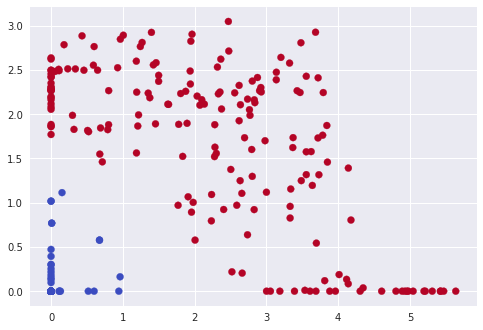

In [67]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [68]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

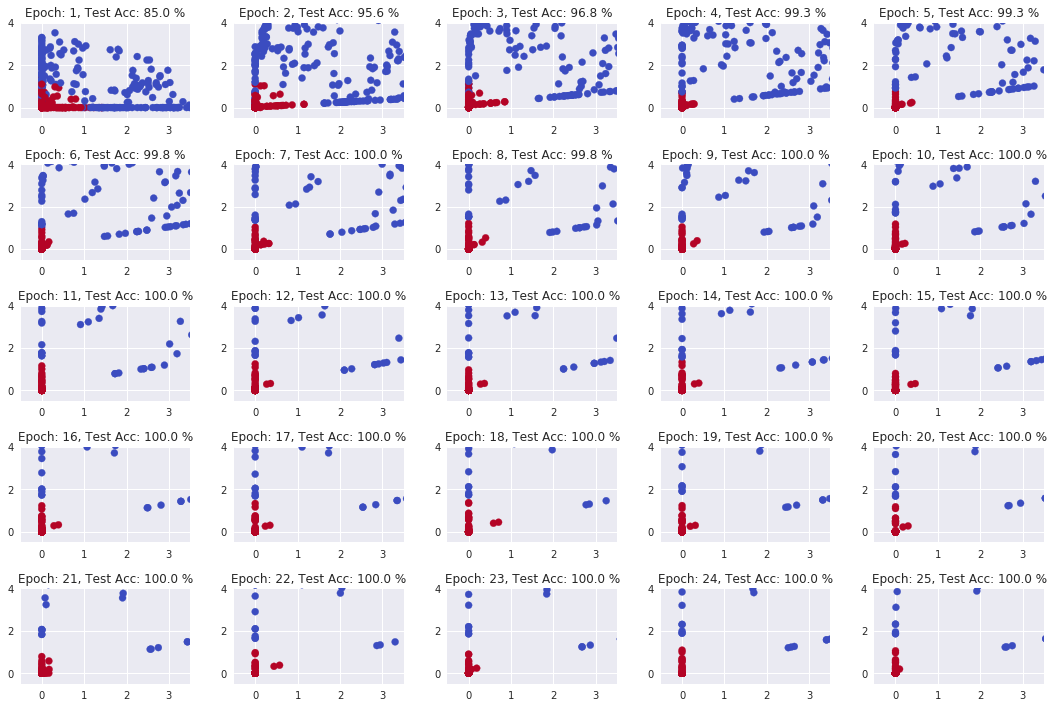

In [69]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [70]:
df = pd.read_csv('../data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
df['Class'].unique()

array([1, 2, 3])

In [72]:
df_class = pd.get_dummies(df['Class'], prefix='Class')

In [73]:
#df = pd.concat([df, df_class], axis=1)

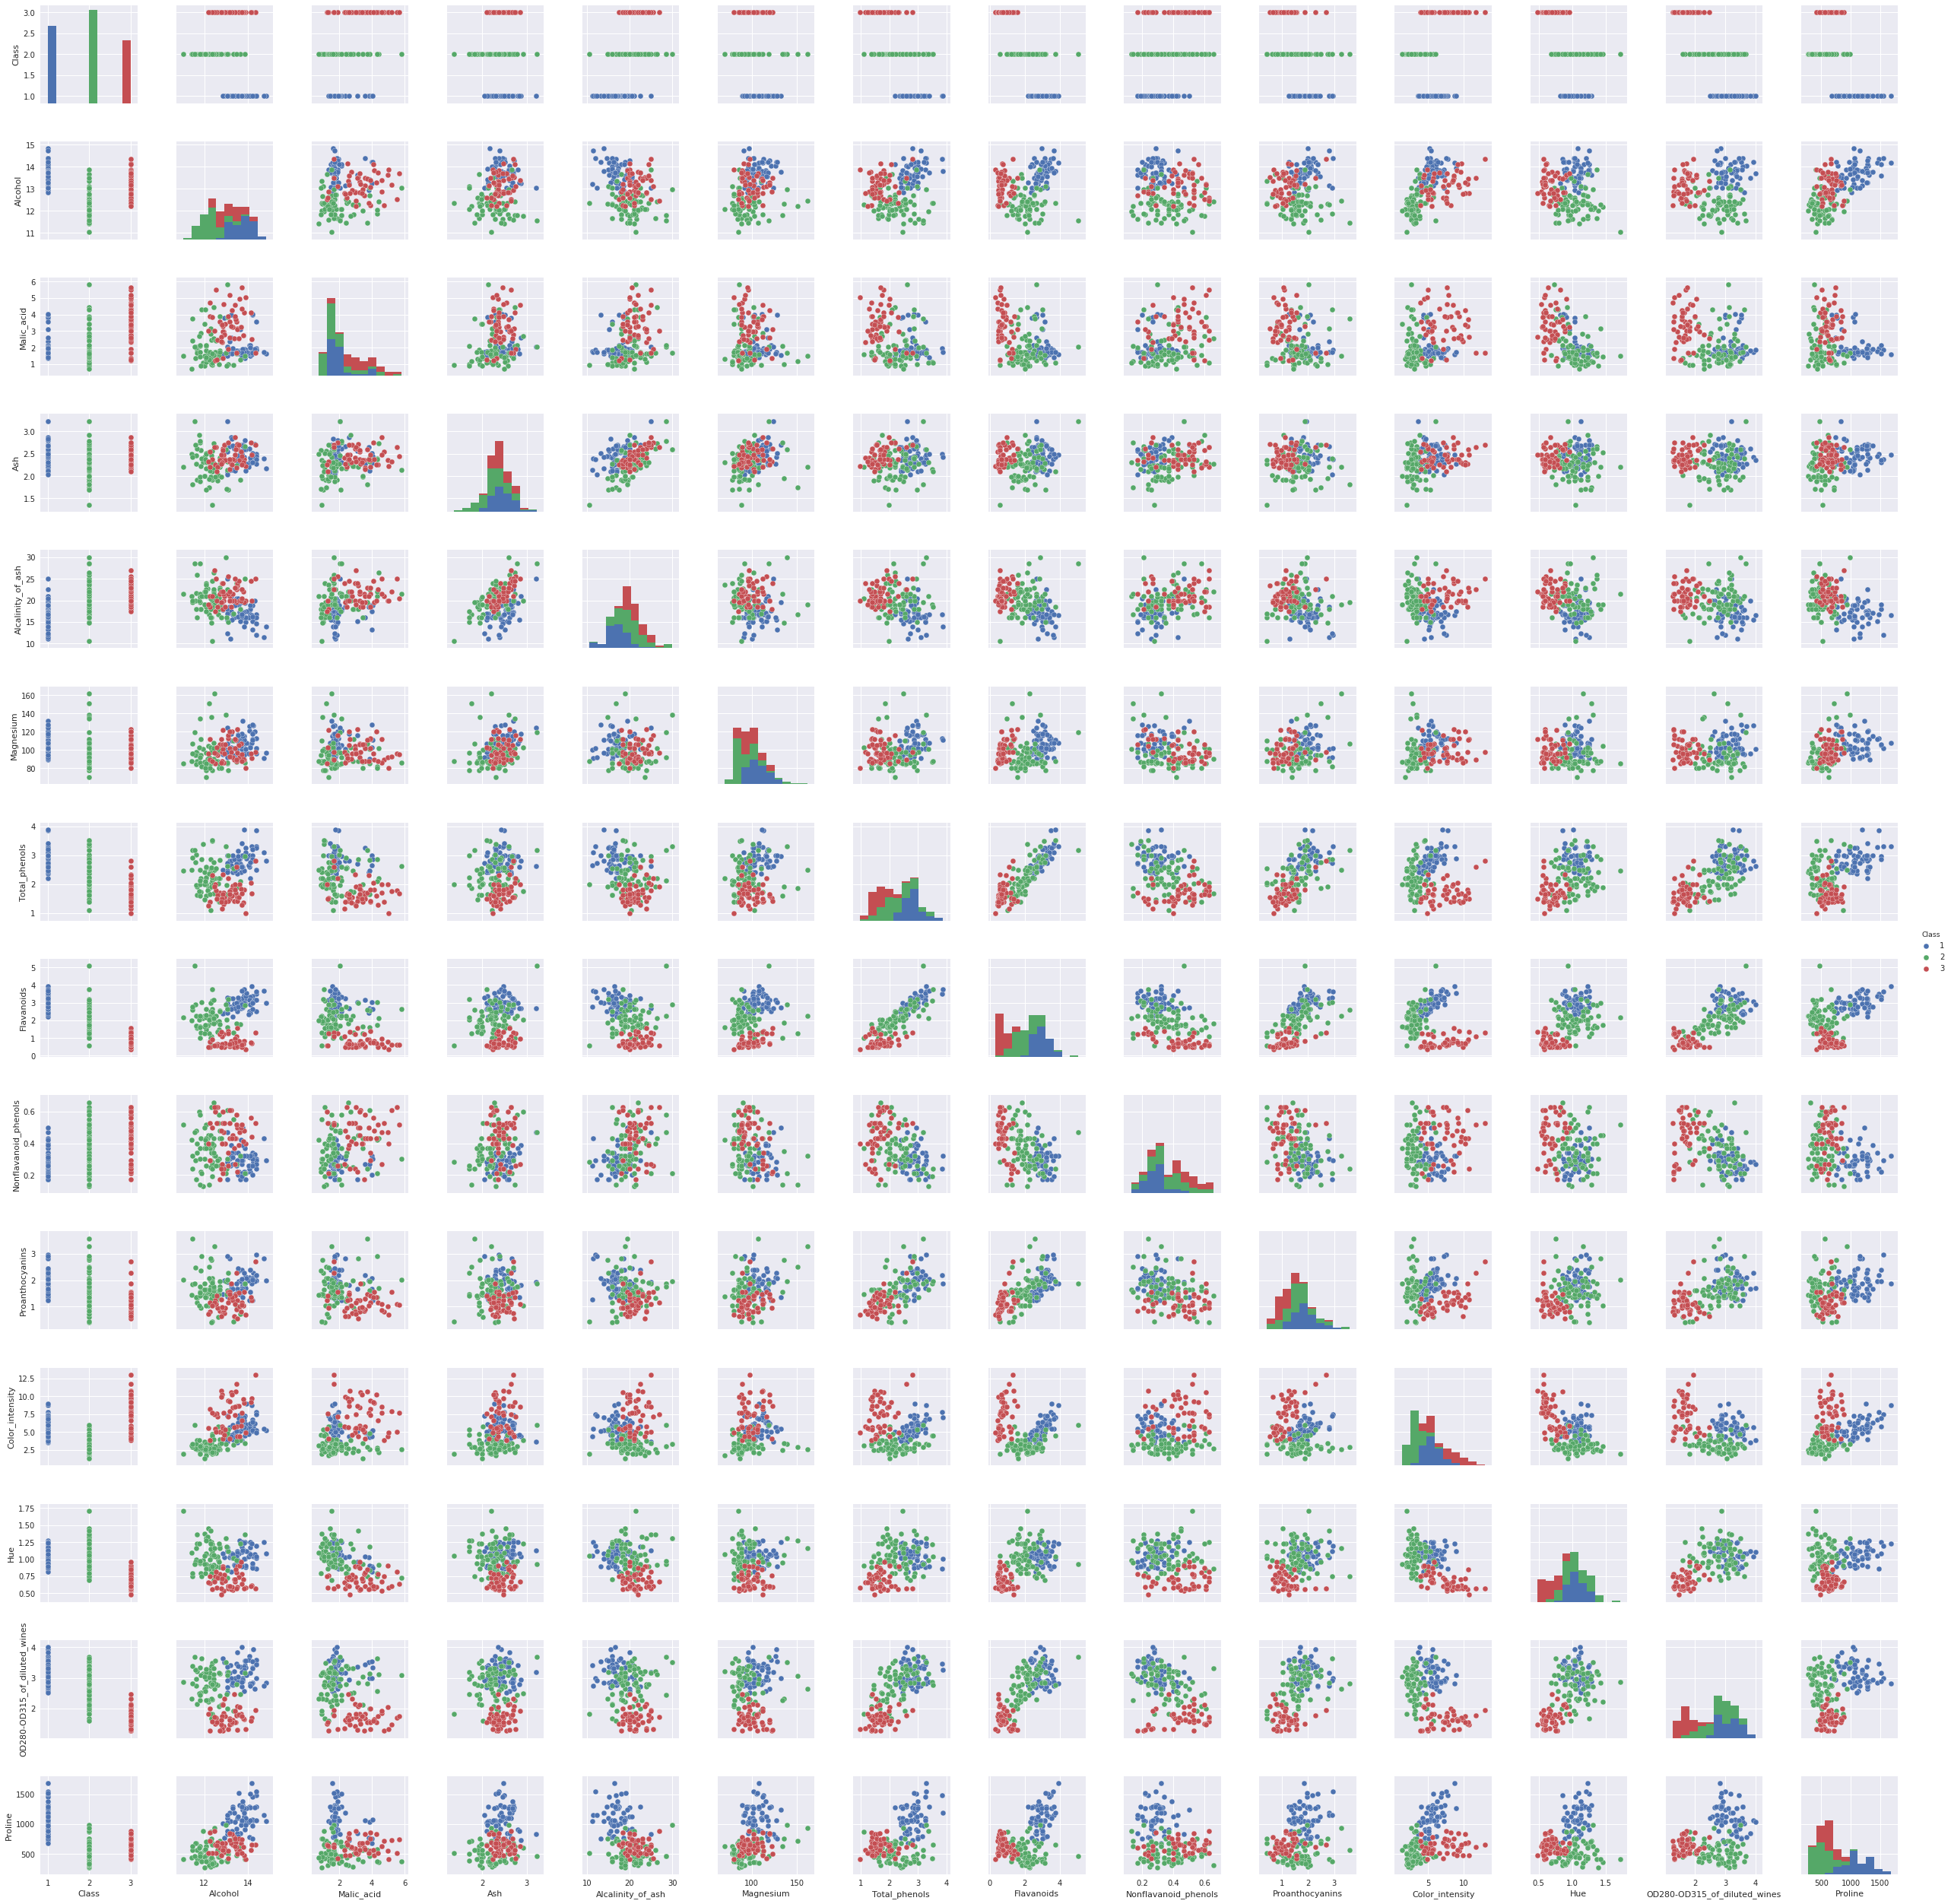

In [74]:
import seaborn as sns
sns.pairplot(df, hue="Class")

In [75]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

sc = StandardScaler()
X = sc.fit_transform(df.drop('Class', axis=1))
y = df_class.values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state = 22)

In [77]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/20
0s - loss: 0.5738 - acc: 0.7522 - val_loss: 0.0567 - val_acc: 0.9655
Epoch 2/20
0s - loss: 0.0580 - acc: 0.9823 - val_loss: 0.0717 - val_acc: 0.9655
Epoch 3/20
0s - loss: 0.0543 - acc: 0.9912 - val_loss: 0.1178 - val_acc: 0.9655
Epoch 4/20
0s - loss: 0.0416 - acc: 0.9912 - val_loss: 0.2714 - val_acc: 0.9655
Epoch 5/20
0s - loss: 0.0075 - acc: 0.9912 - val_loss: 0.3831 - val_acc: 0.9655
Epoch 6/20
0s - loss: 0.0210 - acc: 0.9912 - val_loss: 0.4579 - val_acc: 0.9655
Epoch 7/20
0s - loss: 2.1768e-04 - acc: 1.0000 - val_loss: 0.5167 - val_acc: 0.9655
Epoch 8/20
0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5525 - val_acc: 0.9655
Epoch 9/20
0s - loss: 5.5700e-04 - acc: 1.0000 - val_loss: 0.5561 - val_acc: 0.9655
Epoch 10/20
0s - loss: 1.7884e-04 - acc: 1.0000 - val_loss: 0.5561 - val_acc: 0.9655
Epoch 11/20
0s - loss: 1.2437e-04 - acc: 1.0000 - val_loss: 0.5560 - val_acc: 0.9655
Epoch 12/20
0s - loss: 8.2046e-05 - acc: 1.0000 - val_los

In [79]:
y_pred = model.predict(X_test)

In [80]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
accuracy_score(y_test_class, y_pred_class)

0.94444444444444442

In [83]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.89      1.00      0.94        16
          2       1.00      0.82      0.90        11

avg / total       0.95      0.94      0.94        36



In [84]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 9,  0,  0],
       [ 0, 16,  0],
       [ 0,  2,  9]])

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [85]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,), kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X, y, batch_size=8, epochs=25, verbose=2, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/25
0s - loss: 0.7539 - acc: 0.6761 - val_loss: 1.0571 - val_acc: 0.4722
Epoch 2/25
0s - loss: 0.2012 - acc: 0.9859 - val_loss: 0.9023 - val_acc: 0.6111
Epoch 3/25
0s - loss: 0.0980 - acc: 0.9789 - val_loss: 0.6993 - val_acc: 0.6667
Epoch 4/25
0s - loss: 0.0971 - acc: 0.9789 - val_loss: 0.3541 - val_acc: 0.8333
Epoch 5/25
0s - loss: 0.0517 - acc: 0.9859 - val_loss: 0.4605 - val_acc: 0.8333
Epoch 6/25
0s - loss: 0.0838 - acc: 0.9859 - val_loss: 0.6896 - val_acc: 0.5556
Epoch 7/25
0s - loss: 0.0426 - acc: 0.9859 - val_loss: 0.8803 - val_acc: 0.4722
Epoch 8/25
0s - loss: 0.0627 - acc: 0.9859 - val_loss: 0.7992 - val_acc: 0.4722
Epoch 9/25
0s - loss: 0.0404 - acc: 0.9930 - val_loss: 0.6947 - val_acc: 0.5278
Epoch 10/25
0s - loss: 0.0596 - acc: 0.9859 - val_loss: 0.8365 - val_acc: 0.4167
Epoch 11/25
0s - loss: 0.0738 - acc: 0.9789 - val_loss: 0.7484 - val_acc: 0.3333
Epoch 12/25
0s - loss: 0.0764 - acc: 0.9718 - val_loss: 0.3907 - val_acc:

In [88]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])
features = features_function([X])[0]
features.shape

(178, 2)

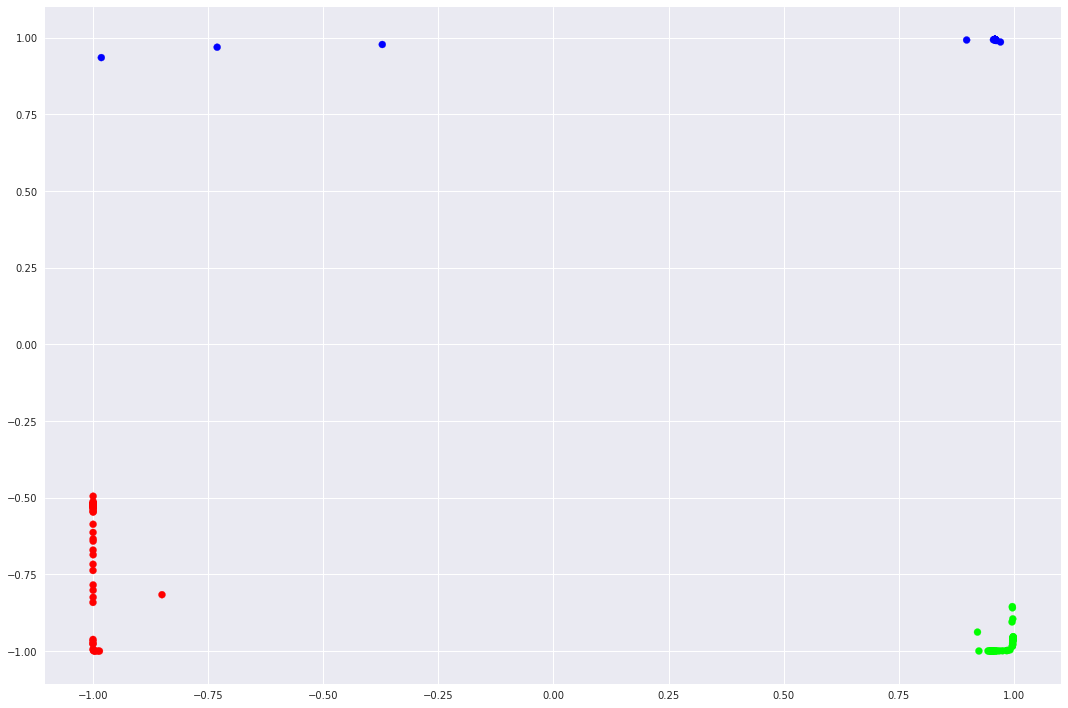

In [89]:
plt.figure(figsize=(15,10))
plt.scatter(features[:, 0], features[:, 1], c=y, cmap='coolwarm')
plt.tight_layout()

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [91]:
from keras.layers import Input
from keras.models import Model

In [94]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.fit(X, y, batch_size=8, epochs=25, verbose=2, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/25
0s - loss: 0.5719 - acc: 0.7887 - val_loss: 0.8576 - val_acc: 0.3611
Epoch 2/25
0s - loss: 0.2087 - acc: 0.9437 - val_loss: 0.6205 - val_acc: 0.6111
Epoch 3/25
0s - loss: 0.1659 - acc: 0.9577 - val_loss: 0.7844 - val_acc: 0.3889
Epoch 4/25
0s - loss: 0.1414 - acc: 0.9507 - val_loss: 0.7066 - val_acc: 0.1944
Epoch 5/25
0s - loss: 0.0834 - acc: 0.9718 - val_loss: 0.2477 - val_acc: 1.0000
Epoch 6/25
0s - loss: 0.1353 - acc: 0.9648 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 7/25
0s - loss: 0.1178 - acc: 0.9718 - val_loss: 0.2650 - val_acc: 1.0000
Epoch 8/25
0s - loss: 0.0601 - acc: 0.9859 - val_loss: 0.2607 - val_acc: 1.0000
Epoch 9/25
0s - loss: 0.0394 - acc: 0.9930 - val_loss: 0.1936 - val_acc: 1.0000
Epoch 10/25
0s - loss: 0.0365 - acc: 0.9930 - val_loss: 0.1561 - val_acc: 1.0000
Epoch 11/25
0s - loss: 0.0329 - acc: 0.9930 - val_loss: 0.1601 - val_acc: 1.0000
Epoch 12/25
0s - loss: 0.0146 - acc: 1.0000 - val_loss: 0.1281 - val_acc:

In [96]:
features_function = K.function([inputs], [second_to_last])
features = features_function([X])[0]
features.shape

(178, 2)

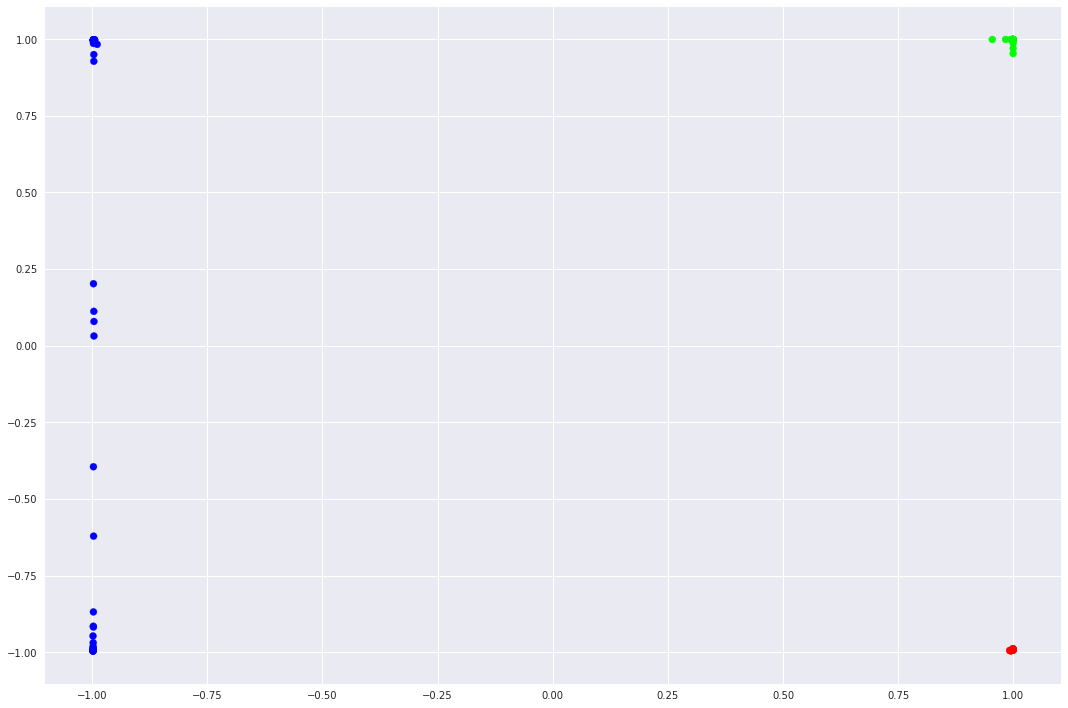

In [97]:
plt.figure(figsize=(15,10))
plt.scatter(features[:, 0], features[:, 1], c=y, cmap='coolwarm')
plt.tight_layout()

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard